In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

In [56]:
def model_ols(y, x):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

def show(data, y_symbol, x_symbol):
    y = data[y_symbol]
    x = data[x_symbol]
    
    model=model_ols(y, x)
    std = statistics.stdev(model.resid)
    entry_threshold = 2 # entrada em 2 desvio padrão

    #plt.figure(figsize=(15,6))
    plt.figure(figsize=(10,5))
    plt.plot(model.resid)
    plt.ylabel('Residual')
    plt.title(y_symbol + ' / ' + x_symbol)

    plt.axhline(0, color='black',label='mean',linestyle='--') # Add the mean of residual
    plt.axhline(entry_threshold*std, color='green', linestyle='--',label='trade')
    plt.axhline(-entry_threshold*std, color='green', linestyle='--')

    plt.legend()
    plt.show()

In [57]:
pairs = pd.read_csv('datasets/cointegrated_pairs.csv', index_col=0)
data = pd.read_csv('datasets/data.csv', index_col=0)
pairs.head(3)

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr,Signal,SignalPerc
0,AALR3,BRDT3,0.020164,-3.196919,0.797778,13,0.411970,0.867264,LS,0.493444
1,AALR3,IGTA3,0.031051,-3.043213,0.425810,14,0.450255,0.892426,LS,0.250279
2,AALR3,LREN3,0.003184,-3.774049,0.474251,7,0.347885,0.924388,LS,0.361509


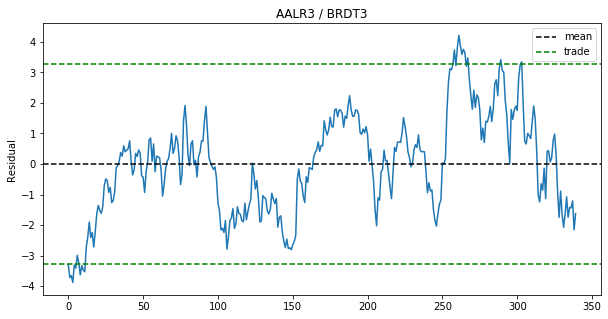

In [59]:
show(data, 'AALR3', 'BRDT3')

In [60]:
df_hurst = pairs.loc[(pairs['Hurst'] > 0) & (pairs['Hurst'] < 0.4)]
df_hurst

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr,Signal,SignalPerc
2,AALR3,LREN3,0.003184,-3.774049,0.474251,7,0.347885,0.924388,LS,0.361509
4,AALR3,PSSA3,0.001902,-3.918606,0.524651,8,0.358682,0.904918,SL,0.164717
7,ABCB4,CMIG4,0.010542,-3.412442,1.114615,11,0.369002,0.896571,LS,0.308510
9,ABCB4,IDNT3,0.015924,-3.277310,2.207681,15,0.371171,0.566730,LS,1.264207
15,ABCB4,PSSA3,0.019406,-3.210118,0.342280,11,0.323858,0.851280,LS,0.609656
...,...,...,...,...,...,...,...,...,...,...
5070,WSON33,POMO4,0.005090,-3.637086,7.233340,7,0.379084,0.884680,LS,0.059838
5071,WSON33,PSSA3,0.005197,-3.630908,0.791332,9,0.317671,0.822339,SL,0.223544
5072,WSON33,PTBL3,0.000382,-4.337603,4.885918,6,0.338449,0.909349,SL,0.071737
5073,WSON33,RCSL4,0.014661,-3.304901,12.311918,10,0.384673,0.808838,LS,1.288990


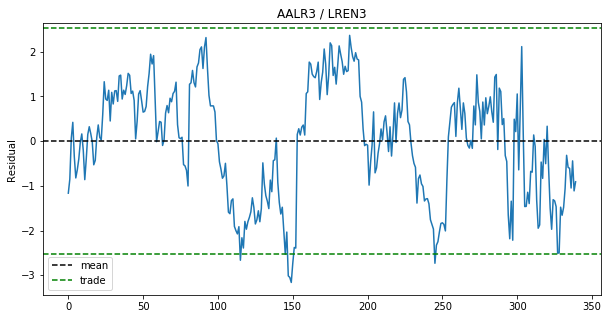

In [62]:
show(data, 'AALR3', 'LREN3')

In [63]:
df_hurst.loc[(df_hurst['SignalPerc'] >= 0.9)]

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr,Signal,SignalPerc
9,ABCB4,IDNT3,0.015924,-3.277310,2.207681,15,0.371171,0.566730,LS,1.264207
51,ALPA4,SCAR3,0.041356,-2.935653,0.779253,13,0.321511,0.867939,SL,1.021261
70,ALUP11,CESP3,0.042943,-2.921156,0.616689,11,0.370491,0.850228,LS,1.030688
127,ALUP11,TOTS3,0.026505,-3.100656,0.147483,12,0.364783,0.817161,SL,0.963145
132,ALUP11,WIZS3,0.000034,-4.908583,1.000672,5,0.240830,0.933828,SL,0.989518
...,...,...,...,...,...,...,...,...,...,...
5040,WIZS3,ENGI4,0.006057,-3.584870,1.483104,9,0.385756,0.901849,LS,1.342771
5050,WIZS3,PINE4,0.039624,-2.952026,2.562194,13,0.349068,0.797493,LS,0.927273
5055,WIZS3,TAEE11,0.009170,-3.456761,1.129583,6,0.335894,0.919071,LS,1.549157
5059,WIZS3,UCAS3,0.042692,-2.923420,2.168759,10,0.315888,0.895889,LS,1.183649


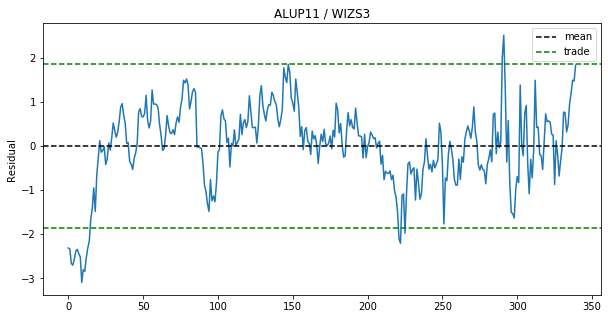

In [68]:
show(data, 'ALUP11', 'WIZS3')